In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [22]:
sim_list = ['fRpoly-Rcore1.0', 'fR1.2-fg0.1-MB0.002-MD0.05-JD0.0521', 'fRpoly-Rcore1.0-MB0.004', 'fR1.2-fg0.1-noMB-MD0.05']

def read_snap(idx, sim_idx, lvl='lvl3', parttype=[0], fields=['Coordinates', 'Masses', 'Velocities'],
              basepath = '/n/holyscratch01/hernquist_lab/abeane/starbar_runs/runs/'):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output'
    return arepo.Snapshot(fname, idx, parttype=parttype, fields=fields, combineFiles=True)

def read_sfr(sim_idx, lvl='lvl3', basepath = '/n/holyscratch01/hernquist_lab/abeane/starbar_runs/runs/'):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output/sfr.txt'
    return np.genfromtxt(fname)

In [35]:
snap_list = [read_snap(48, i, fields=['Coordinates', 'Masses', 'Velocities', 'VirialParameter', 'Density']) for i in [0, 1, 2, 3]]

In [36]:
center = np.array([200, 200, 200])
rcut = 1.0

key_list = []
for snap in snap_list:
    r = np.linalg.norm(snap.part0.pos - center, axis=1)
    key = np.where(r < rcut)[0]
    key_list.append(key)

In [38]:
sf_thresh = 0.301302 # 100 cm^-3

for i in [0, 1, 2, 3]:
    bool_virial = snap_list[i].part0.VirialParameter[key_list[i]] < 1
    bool_sf = np.logical_and(bool_virial, snap_list[i].part0.Density[key_list[i]] > sf_thresh)
    key_virial = np.where(bool_virial)[0]
    key_sf = np.where(bool_sf)[0]
    mass_virial = np.sum(snap_list[i].part0.Masses[key_list[i]][key_virial])
    mass_sf = np.sum(snap_list[i].part0.Masses[key_list[i]][key_sf])
    mass_tot = np.sum(snap_list[i].part0.Masses[key_list[i]])
    print(i, mass_virial/mass_tot, mass_sf/mass_tot, mass_tot)

0 0.53598887 0.17425933 0.012361895
1 0.59261614 0.52403873 0.03288025
2 0.5333857 0.17261437 0.010125414
3 0.6327362 0.57148 0.038159467


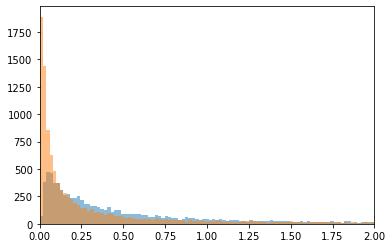

In [14]:
plt.hist(snap_list[0].part0.VirialParameter[key_list[0]], bins=np.linspace(0, 2, 100), alpha=0.5)
plt.hist(snap_list[1].part0.VirialParameter[key_list[1]], bins=np.linspace(0, 2, 100), alpha=0.5)
plt.xlim(0, 2)
plt.show()